In [3]:
from sympy import *
from sympy.physics.mechanics import * 
import numpy as np
from scipy.integrate import odeint, ode, solve_ivp


init_vprinting()


In [4]:
g, m1, m2, ell1, ell2, t = symbols('g m1 m2 ell1 ell2 t')
theta1, theta2 = dynamicsymbols('theta1 theta2')

xm1 = ell1*sin(theta1)
ym1 = - ell1*cos(theta1)

xm2 = ell1*sin(theta1) + ell2*sin(theta2)
ym2 = - ell1*cos(theta1) - ell2*cos(theta2)


# time derivatives
xm1_dot = diff(xm1, t)
ym1_dot = diff(ym1, t)

xm2_dot = diff(xm2, t)
ym2_dot = diff(ym2, t)


theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1_dot, t)

theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2_dot, t)

#Defining kinetic energy
T = 1/2 * m1 * (xm1_dot**2 + ym1_dot**2) + 1/2 * m2 * (xm2_dot**2 + ym2_dot **2)

#Defining potential energy   m*g*h = m * g * y
V = m1 * g * ym1 + m2 * g * ym2

#Lagrangian
L = T - V 

eqn1 = diff(diff(L, theta1_dot), t) - diff(L, theta1)
eqn2 = diff(diff(L, theta2_dot), t) - diff(L, theta2)

sln1 = solve(eqn1, theta1_ddot)[0]
sln2 = solve(eqn2, theta2_ddot)[0]



x = Matrix([theta1, theta1_dot, theta2, theta2_dot])
x_dot = diff(x, t)


Eq(x_dot, Matrix([theta1_dot, sln1, theta2_dot, sln2]))




       ⎡                                         θ₁̇                          
       ⎢                                                                      
       ⎢ ⎛                       2                                            
⎡θ₁̇⎤   ⎢-⎝ell₂⋅m₂⋅sin(θ₁ - θ₂)⋅θ₂̇  + ell₂⋅m₂⋅cos(θ₁ - θ₂)⋅θ₂̈ + g⋅m₁⋅sin(θ₁)
⎢  ⎥   ⎢──────────────────────────────────────────────────────────────────────
⎢θ₁̈⎥   ⎢                                   ell₁⋅(m₁ + m₂)                    
⎢  ⎥ = ⎢                                                                      
⎢θ₂̇⎥   ⎢                                         θ₂̇                         
⎢  ⎥   ⎢                                                                      
⎣θ₂̈⎦   ⎢                                  2                                  
       ⎢              ell₁⋅sin(θ₁ - θ₂)⋅θ₁̇  - ell₁⋅cos(θ₁ - θ₂)⋅θ₁̈ - g⋅sin(θ
       ⎢              ────────────────────────────────────────────────────────
       ⎣                                        ell₂

In [245]:
sln1_corrected = (-ell2*m2*sin(theta1 - theta2)*theta2_dot**2 +g * m1 * sin(theta1) + g*m2*sin(theta1))/(ell1*(m1+m2))
sln2_corrected = (ell1*sin(theta1 - theta2)*theta1_dot**2 - g*sin(theta2))/ell2
sln2_corrected

In [246]:
#help me 

correction_matrix = Matrix([[1, 0, 0, 0], [0, 1, 0, (-ell2*m2*cos(theta1 - theta2))/(ell1*(m1+m2))],[0, 0, 1, 0],[0, ell1*cos(theta1 - theta2)/ell2, 0, 1]])
correction_matrix



⎡1          0          0            0           ⎤
⎢                                               ⎥
⎢                         -ell₂⋅m₂⋅cos(θ₁ - θ₂) ⎥
⎢0          1          0  ──────────────────────⎥
⎢                             ell₁⋅(m₁ + m₂)    ⎥
⎢                                               ⎥
⎢0          0          1            0           ⎥
⎢                                               ⎥
⎢   ell₁⋅cos(θ₁ - θ₂)                           ⎥
⎢0  ─────────────────  0            1           ⎥
⎣          ell₂                                 ⎦

In [247]:
correction_matrix_inv = correction_matrix.inv()
correction_matrix_inv

⎡1                       0                        0                      0    
⎢                                                                             
⎢                     m₁ + m₂                                   ell₂⋅m₂⋅cos(θ₁
⎢0           ──────────────────────────           0  ─────────────────────────
⎢                       2                                                 2   
⎢            m₁ + m₂⋅cos (θ₁ - θ₂) + m₂              ell₁⋅m₁ + ell₁⋅m₂⋅cos (θ₁
⎢                                                                             
⎢0                       0                        1                      0    
⎢                                                                             
⎢   -ell₁⋅m₁⋅cos(θ₁ - θ₂) - ell₁⋅m₂⋅cos(θ₁ - θ₂)                     m₁ + m₂  
⎢0  ────────────────────────────────────────────  0         ──────────────────
⎢                         2                                            2      
⎣    ell₂⋅m₁ + ell₂⋅m₂⋅cos (θ₁ - θ₂) + ell₂⋅m₂      

In [264]:

x = Matrix([theta1, theta1_dot, theta2, theta2_dot])
x_dot = diff(x, t)


Eq(x_dot, Matrix([theta1_dot, sln1_corrected, theta2_dot, sln2_corrected]))


       ⎡                           θ₁̇                           ⎤
       ⎢                                                        ⎥
       ⎢                         2                              ⎥
⎡θ₁̇⎤   ⎢- ell₂⋅m₂⋅sin(θ₁ - θ₂)⋅θ₂̇  + g⋅m₁⋅sin(θ₁) + g⋅m₂⋅sin(θ₁)⎥
⎢  ⎥   ⎢────────────────────────────────────────────────────────⎥
⎢θ₁̈⎥   ⎢                     ell₁⋅(m₁ + m₂)                     ⎥
⎢  ⎥ = ⎢                                                        ⎥
⎢θ₂̇⎥   ⎢                           θ₂̇                           ⎥
⎢  ⎥   ⎢                                                        ⎥
⎣θ₂̈⎦   ⎢                               2                        ⎥
       ⎢           ell₁⋅sin(θ₁ - θ₂)⋅θ₁̇  - g⋅sin(θ₂)            ⎥
       ⎢           ─────────────────────────────────            ⎥
       ⎣                          ell₂                          ⎦

In [249]:
#Findin ODE I'll use
A = Matrix([theta1_dot, sln1_corrected, theta2_dot, sln2_corrected])

ODE_equations = correction_matrix_inv * A
ODE_equations


⎡                                                                           θ₁
⎢                                                                             
⎢                        ⎛                    2            ⎞                  
⎢                     m₂⋅⎝ell₁⋅sin(θ₁ - θ₂)⋅θ₁̇  - g⋅sin(θ₂)⎠⋅cos(θ₁ - θ₂)   -
⎢                     ─────────────────────────────────────────────────── + ──
⎢                                               2                             
⎢                          ell₁⋅m₁ + ell₁⋅m₂⋅cos (θ₁ - θ₂) + ell₁⋅m₂          
⎢                                                                             
⎢                                                                           θ₂
⎢                                                                             
⎢          ⎛                    2            ⎞                                
⎢(m₁ + m₂)⋅⎝ell₁⋅sin(θ₁ - θ₂)⋅θ₁̇  - g⋅sin(θ₂)⎠   (-ell₁⋅m₁⋅cos(θ₁ - θ₂) - ell
⎢───────────────────────────────────────────── + ───

In [250]:
# print(ODE_equations[1])


m2*(ell1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 - g*sin(theta2(t)))*cos(theta1(t) - theta2(t))/(ell1*m1 + ell1*m2*cos(theta1(t) - theta2(t))**2 + ell1*m2) + (-ell2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2 + g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)))/(ell1*(m1 + m2*cos(theta1(t) - theta2(t))**2 + m2))


In [216]:
# print(ODE_equations[3])

(m1 + m2)*(ell1*sin(theta1(t) - theta2(t))*Derivative(theta1(t), t)**2 - g*sin(theta2(t)))/(ell2*(m1 + m2*cos(theta1(t) - theta2(t))**2 + m2)) + (-ell1*m1*cos(theta1(t) - theta2(t)) - ell1*m2*cos(theta1(t) - theta2(t)))*(-ell2*m2*sin(theta1(t) - theta2(t))*Derivative(theta2(t), t)**2 + g*m1*sin(theta1(t)) + g*m2*sin(theta1(t)))/(ell1*(m1 + m2)*(ell2*m1 + ell2*m2*cos(theta1(t) - theta2(t))**2 + ell2*m2))


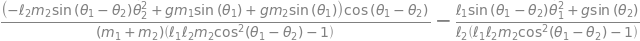

In [123]:
# theta2_dd = ((-ell2*m2*sin(theta1 - theta2)*theta2_dot**2 + g*m1*sin(theta1) + g*m2*sin(theta1))*cos(theta1 - theta2)/((m1 + m2)*(ell1*ell2*m2*cos(theta1 - theta2)**2 - 1)) - (ell1*sin(theta1 - theta2)*theta1_dot**2 + g*sin(theta2))/(ell2*(ell1*ell2*m2*cos(theta1 - theta2)**2 - 1)))
# theta2_dd

In [5]:
g = -9.81
ell1 = 3
ell2 = 1.556643
m1 = 2
m2 = 3


def double_pendelum_ODE(t, y):

   theta1 = y[0]
   theta1_dot = y[1]
   theta2 = y[2]
   theta2_dot = y[3]

   theta1_dd = m2*(ell1*sin(theta1 - theta2)*theta1_dot**2 - g*sin(theta2))*cos(theta1 - theta2)/(ell1*m1 + ell1*m2*cos(theta1 - theta2)**2 + ell1*m2) + (-ell2*m2*sin(theta1 - theta2)*theta2_dot**2 + g*m1*sin(theta1) + g*m2*sin(theta1))/(ell1*(m1 + m2*cos(theta1 - theta2)**2 + m2))

   
   theta2_dd = (m1 + m2)*(ell1*sin(theta1 - theta2)*theta1_dot**2 - g*sin(theta2))/(ell2*(m1 + m2*cos(theta1 - theta2)**2 + m2)) + (-ell1*m1*cos(theta1 - theta2) - ell1*m2*cos(theta1 - theta2))*(-ell2*m2*sin(theta1 - theta2)*theta2_dot**2 + g*m1*sin(theta1) + g*m2*sin(theta1))/(ell1*(m1 + m2)*(ell2*m1 + ell2*m2*cos(theta1 - theta2)**2 + ell2*m2))



   return(theta1_dot, theta1_dd, theta2_dot, theta2_dd)

In [12]:
theta1_0 = np.deg2rad(90)
theta1_dot0 = 0
theta2_0 = np.deg2rad(90)
theta2_dot0 = 0


theta1_dd = 0
theta2_dd = 0

frames = np.linspace(0, 10, 30*10)

#fikk chat til å skrive funksjonen basert på bildet over: 
time_points = np.linspace(0, 5, 300)  # 10 seconds, 30 frames per second
sol = solve_ivp(double_pendelum_ODE, [0, 10], [theta1_0, theta1_dot0, theta2_0, theta2_dot0], t_eval=time_points, method='Radau', atol=1e-11, rtol=1e-7)

theta1 = sol.y[0]
theta1_dot = sol.y[1]
theta2 = sol.y[2]
theta2_dot = sol.y[3]
t = sol.t

theta1_deg = np.rad2deg(sol.y[0])
theta2_deg = np.rad2deg(sol.y[2])
theta1_dot_deg = np.rad2deg(sol.y[1])
theta2_dot_deg = np.rad2deg(sol.y[3])


np.savetxt('double_pend.csv', np.transpose([theta1_deg, theta1_dot_deg, theta2_deg, theta2_dot_deg]), delimiter=',')


In [13]:
# #Trash

# def double_pendelum_ODE(t, y):

#    theta1 = y[0]
#    theta1_dot = y[1]
#    theta2 = y[2]
#    theta2_dot = y[3]


#    theta1_dd = (-ell2*m2*np.sin(theta1 - theta2)*theta2_dot**2 - ell2*m2*np.cos(theta1 - theta2)*theta2_dd + g*m1*np.sin(theta1) + g*m2*np.sin(theta1)) / (ell1*(m1 + m2))
#    theta2_dd = (ell1*np.sin(theta1 - theta2)*theta1_dot**2 - ell1*np.cos(theta1 - theta2)*theta1_dd + g*np.sin(theta2))/ell2

#    # theta1_dd = (-ell2*m2*np.sin(y[0] - y[2])*y[3]**2 - ell2*m2*np.cos(y[0] - y[2])*theta2_dd + g*m1*np.sin(y[0]) + g*m2*np.sin(y[0])) / (ell1*(m1 + m2))
#    # theta2_dd = (ell1*np.sin(y[0] - y[2])*y[1] - ell1*np.cos(y[0] - y[2])*theta1_dd + g*np.sin(y[2])/ell2)
#    return(theta1_dot, theta1_dd, theta2_dot, theta2_dd)
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.672e-02 ...  4.983e+00  5.000e+00]
        y: [[ 1.571e+00  1.571e+00 ... -4.339e-01 -4.502e-01]
            [ 0.000e+00 -1.367e-02 ... -9.710e-01 -9.815e-01]
            [ 1.571e+00  1.572e+00 ...  3.460e+00  3.403e+00]
            [ 0.000e+00  1.317e-01 ... -3.359e+00 -3.384e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 5149
     njev: 41
      nlu: 256

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

In [ ]:
# theta1_dd = (m2*(ell1*sin(theta1 - theta1)*theta1_dot**2 + g*sin(theta1))*cos(theta1 - theta1)/(ell1*ell2*m2*cos(theta1 - theta1)**2 - 1) - 
#              (-ell2*m2*sin(theta1 - theta1)*theta2_dot**2 + g*m1*sin(theta1) + g*m2*sin(theta1))/(ell1*(m1 + m2)*(ell1*ell2*m2*cos(theta1 - 
#               theta1)**2 - 1)))

# theta1_dd                 

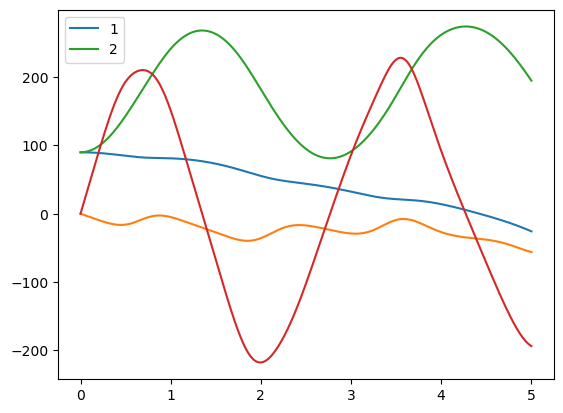

In [14]:


plt.plot(t, theta1_deg, label='1')
plt.plot(t, theta1_dot_deg)
plt.plot(t, theta2_deg, label='2')
plt.plot(t, theta2_dot_deg)
plt.legend()




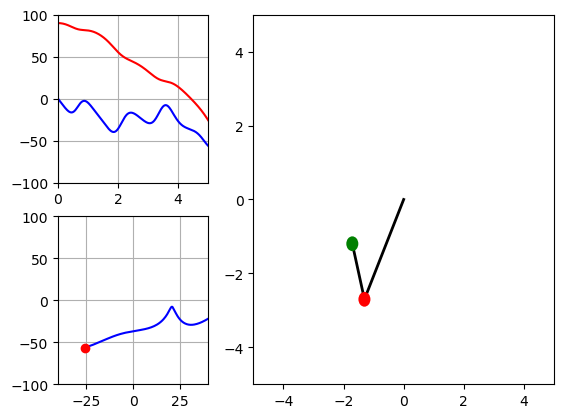

In [15]:
def pend_pos1(theta):
   theta1 = np.deg2rad(theta)
   return (ell1*np.sin(theta1), -ell1*np.cos(theta1))

def pend_pos2(theta1_deg, theta2_deg):
   theta1 = np.deg2rad(theta1_deg)
   theta2 = np.deg2rad(theta2_deg)
   return (ell1*np.sin(theta1) + ell2*np.sin(theta2), -ell1*np.cos(theta1) - ell2*np.cos(theta2))




fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])




ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

theta_curve, = ax0.plot(t[0], theta1_deg[0], 'r')
theta_dot_curve, = ax0.plot(t[0], theta1_dot_deg[0], 'b')

phase_curve, = ax1.plot(theta1_deg[0], theta1_dot_deg[0], 'b')
phase_dot, = ax1.plot(theta1_deg[0], theta1_dot_deg[0], 'ro')

x0, y0 = pend_pos1(theta1_0)
x0_2, y0_2 = pend_pos2(theta1_0, theta2_0)

line, = ax2.plot([0, x0], [0, y0], lw=2, c = 'k')
circle =ax2.add_patch(plt.Circle(pend_pos1(theta1_0), 0.2, fc='r', zorder=3))
line2, = ax2.plot([x0, x0_2], [y0, y0_2], lw=2, c='k')
circle2 = ax2.add_patch(plt.Circle(pend_pos2(theta1_0, theta2_0), 0.2, fc='g', zorder=3))

ax0.set_xlim(0,5)
ax0.set_ylim(-100,100)

ax1.set_xlim(-40, 40)
ax1.set_ylim(-100,100)
ax1.grid()
ax0.grid()

ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)



def animate(i):
   theta_curve.set_data(t[:i+1], theta1_deg[:i+1])
   theta_dot_curve.set_data(t[:i+1], theta1_dot_deg[:i+1])

   phase_curve.set_data(theta1_deg[:i+1], theta1_dot_deg[:i+1])
   phase_dot.set_data(theta1_deg[i], theta1_dot_deg[i])

   x, y = pend_pos1(theta1_deg[i])
   x2, y2 = pend_pos2(theta1_deg[i], theta2_deg[i])
   line.set_data([0, x], [0,y])
   line2.set_data([x, x2], [y, y2])
   circle.set_center((x,y))
   circle2.set_center((x2, y2))


ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('time_domain_double_pend.mp4', writer=ffmpeg_writer)
